## mnist prediction using simple nerural network 

In [55]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten 

#### plotting
import matplotlib.pyplot as plt 
import seaborn as sns
########### 
import pandas as pd
import numpy as np 


In [56]:
(x_train , y_train) , (x_test , y_test ) = keras.datasets.mnist.load_data()

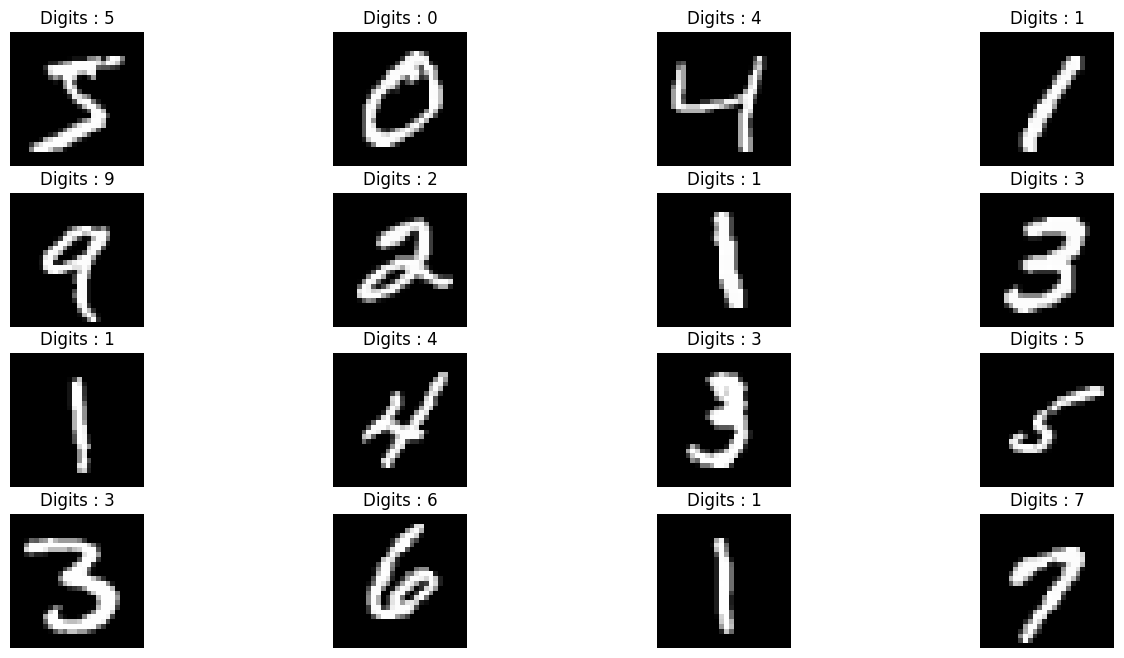

In [57]:
# samples  16
fig, axes = plt.subplots(4 , 4 , figsize = (16 , 8 ))
for i , ax in enumerate(axes.flat):
    ax.imshow(x_train[i] , cmap = 'gray')
    ax.set_title(f'Digits : {y_train[i]}')
    ax.axis('off')


In [58]:
# scalling 
x_train =  np.round(x_train / 255.0   , 3 )
x_test = np.round(x_test / 255.0, 3 ) 

In [59]:
# model building
model = Sequential()
model.add(Flatten(input_shape = (28 , 28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(12 , activation= 'relu'))
model.add(Dense(32 , activation= 'softmax'))

c:\Users\Ujjwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,444 (400.17 KB)

 Trainable params: 102,444 (400.17 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
 model.compile(loss = 'sparse_categorical_crossentropy' , optimizer= 'Adam' , metrics=  ['accuracy'])

In [66]:
history = model.fit(x_train , y_train , epochs= 25  , validation_split= 0.2 ) 

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9525 - loss: 0.1576 - val_accuracy: 0.9574 - val_loss: 0.1366
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9707 - loss: 0.1008 - val_accuracy: 0.9682 - val_loss: 0.1014
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9777 - loss: 0.0719 - val_accuracy: 0.9717 - val_loss: 0.0960
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0580 - val_accuracy: 0.9706 - val_loss: 0.0998
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9726 - val_loss: 0.0972
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0383 - val_accuracy: 0.9734 - val_loss: 0.0924
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0268 - val_accuracy: 0.9716 - val_loss: 0.1056
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0272 - 

In [70]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


array([[5.3377680e-17, 4.3418512e-21, 4.8913960e-13, ..., 6.6089143e-32,
        1.0023892e-26, 3.2602902e-30],
       [8.0504624e-19, 2.0154832e-08, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.5338007e-33],
       [3.3373007e-12, 9.9999869e-01, 4.7174460e-09, ..., 1.4286191e-13,
        1.0511998e-17, 3.4813480e-16],
       ...,
       [3.7899942e-20, 7.6882722e-22, 1.6265940e-23, ..., 9.3858657e-37,
        3.0396043e-33, 4.5721062e-30],
       [4.7506673e-22, 1.4662862e-22, 1.1073480e-28, ..., 4.3355685e-33,
        1.1300740e-32, 2.7091435e-36],
       [5.2212542e-13, 2.1386176e-28, 1.7669508e-16, ..., 1.5884122e-29,
        1.6461753e-31, 3.5327853e-27]], dtype=float32)

In [73]:
y_pred  = y_pred.argmax(axis =1 )

In [74]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , y_pred )


0.9769

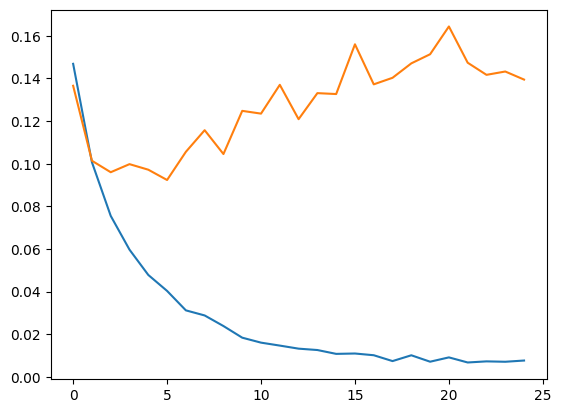

In [75]:
#plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

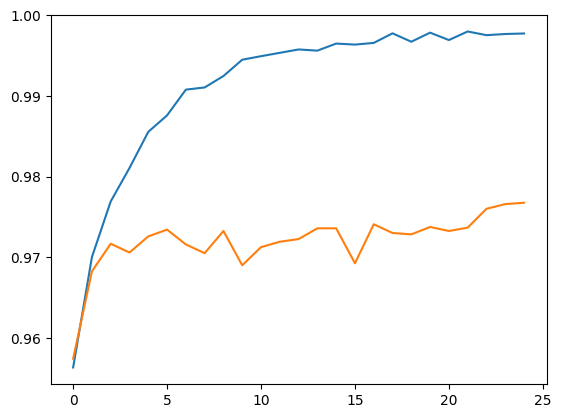

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Delete below itmes this is unrealated only for leetcode

In [1]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution(object):
    def removeNthFromEnd(self, head, n):
        """
        :type head: ListNode
        :type n: int
        :rtype: ListNode
        """

        


In [40]:
node1 = ListNode()

In [41]:
node1.val  = 2 

In [42]:
node1.next = ListNode()

In [43]:
node1.next.val = 3 

In [44]:
node1.next.next = ListNode()
node1.next.next.val = 4 

In [45]:
node1.next.next.next = ListNode()
node1.next.next.next.val = 5

In [46]:
node1.next.next.next.next = ListNode()
node1.next.next.next.next.val = 6

In [47]:
l:int = 0 
temp = node1 
while temp  is not None :
    l += 1 
    temp = temp.next

node1.next

In [ ]:
2 ,3 ,4 ,5 ,6 

In [ ]:
#output = 2,3,4,6

In [35]:
loc = l - 2 
loc

3

In [ ]:
node1.next = 3
node1.next.next = 4 
node1.next.next = 5

In [49]:
temp = node1

In [50]:
for i in range(2):
    temp = temp.next



In [52]:
while node1 is not None :
    temp = node1.next 
;    

In [59]:
temp1 = node1 
temp1.next.next.next.next

In [63]:
while temp1 is not None:
    temp2 = temp1.next 
    for i in range(2):
        if temp2:
            temp1.next == temp1.next.next
        else :
            temp2 = temp2.next

    temp1 = temp1.next      




AttributeError: 'NoneType' object has no attribute 'next'

In [ ]:
while node1 is not None :
    temp = node1.next 
;    

In [ ]:
# remove  2 i.e 5 - 2 